In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg


Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 40.0MB/s]


In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [ ]:
mobile_sales.describe(datetime_is_numeric=True)

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [ ]:
# Jan 2001
# Jan 2019

# 1, 2, 3, 4,5...,18
# 18 years + 1 month
18*12 + 1

217

In [ ]:
mobile_sales.shape

(217, 2)

In [ ]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<Axes: xlabel='DATE'>

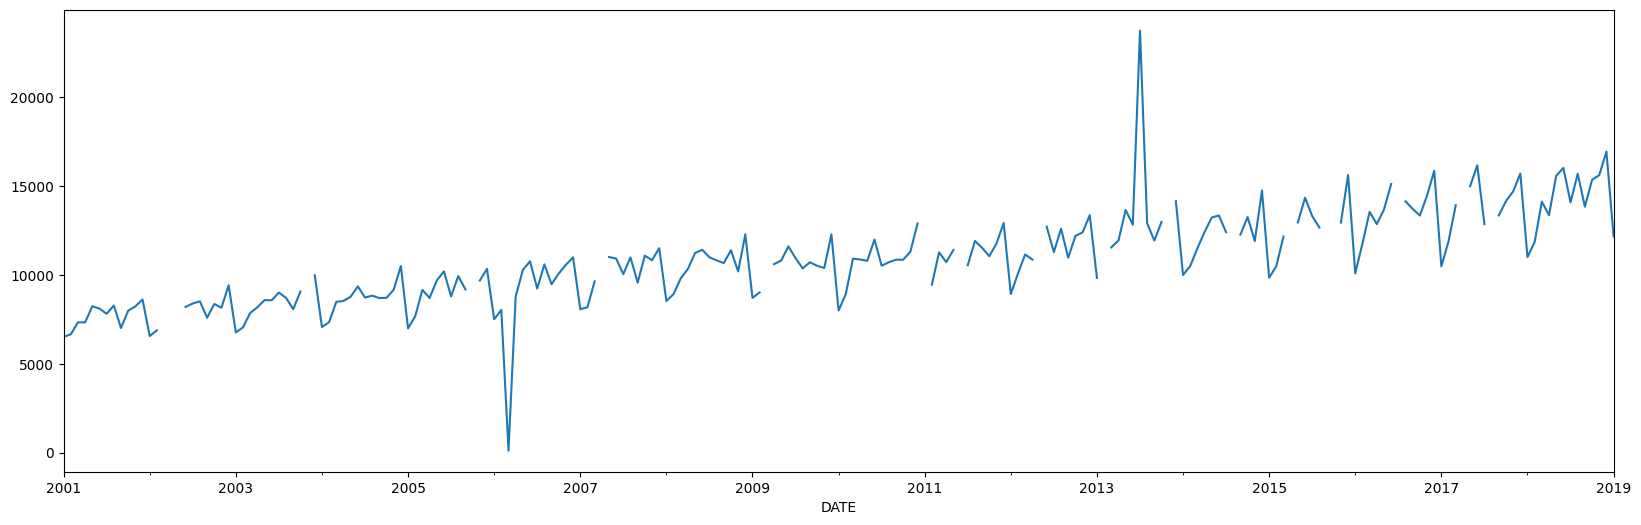

In [ ]:
mobile_sales['Sales'].plot()

In [ ]:
mobile_sales['Sales'].isna().sum()

19

In [ ]:
mobile_sales['Sales'].mean()

10842.757575757576

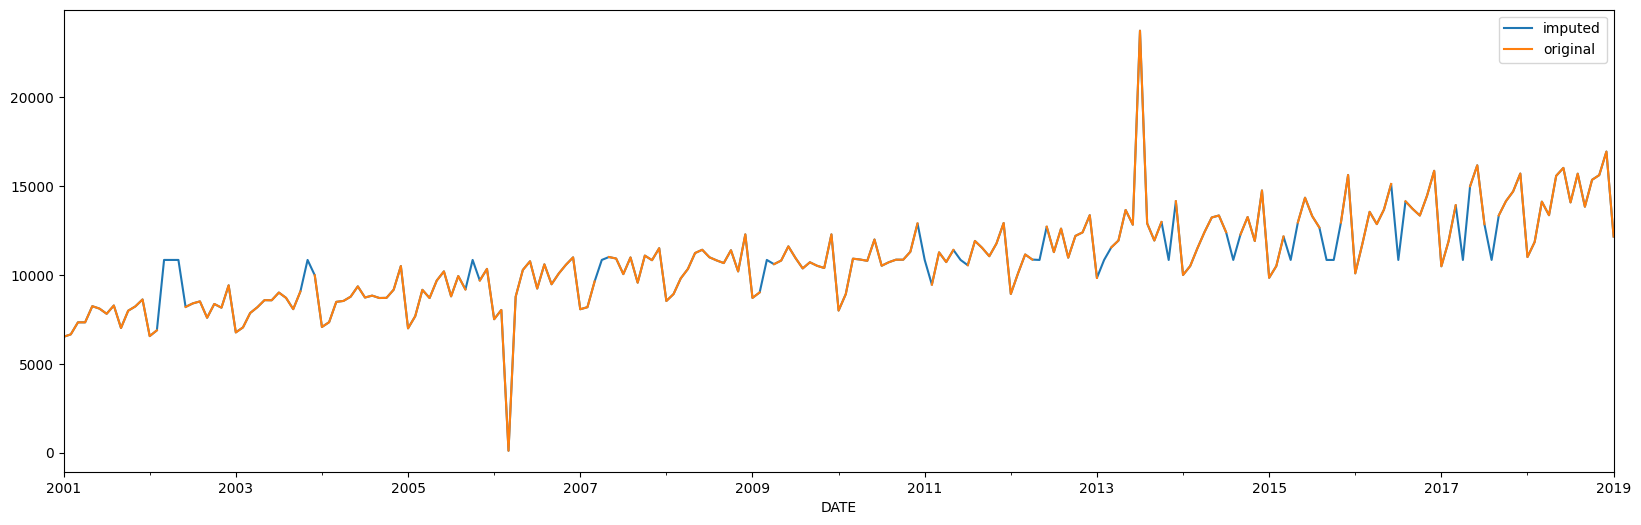

In [ ]:

mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

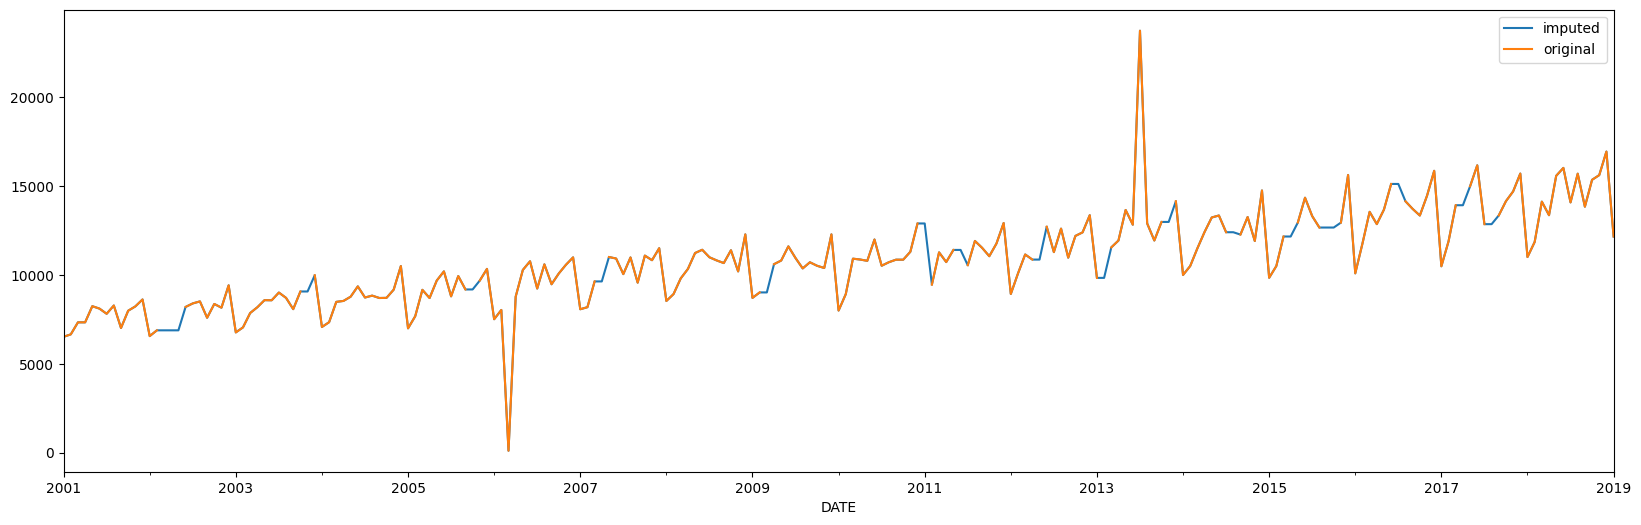

In [ ]:

mobile_sales.Sales.fillna(method='ffill').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

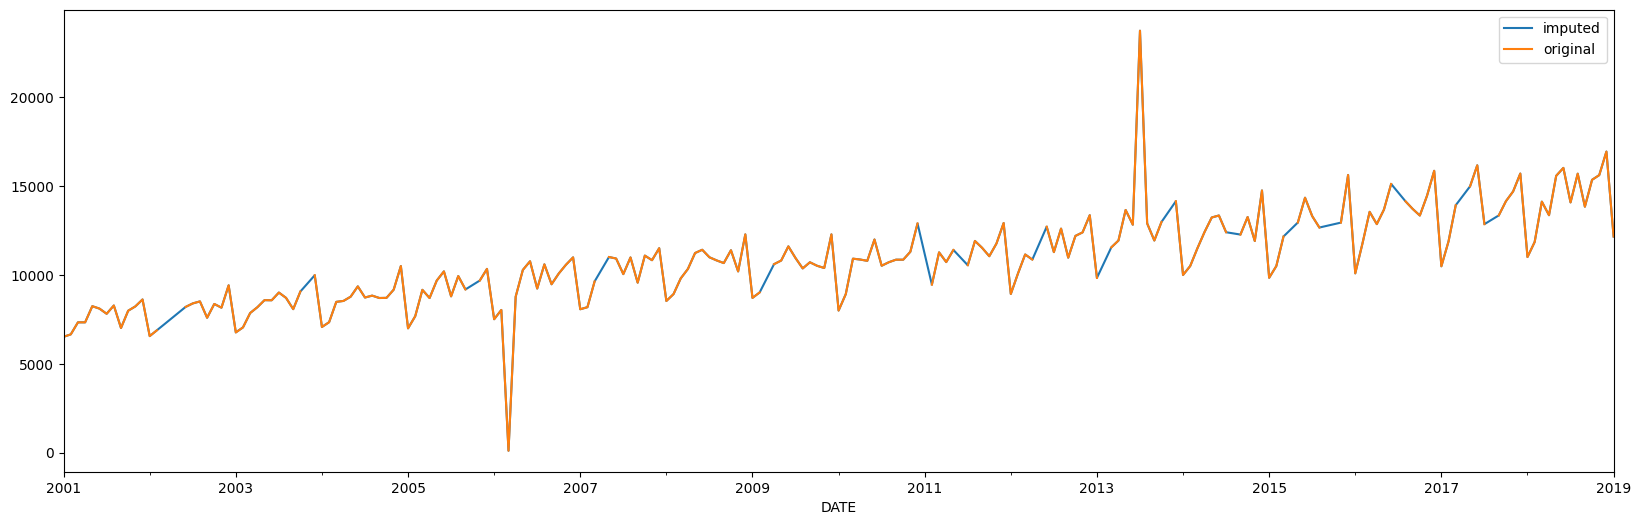

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

In [ ]:
mobile_sales['Sales'].isna().sum()

0

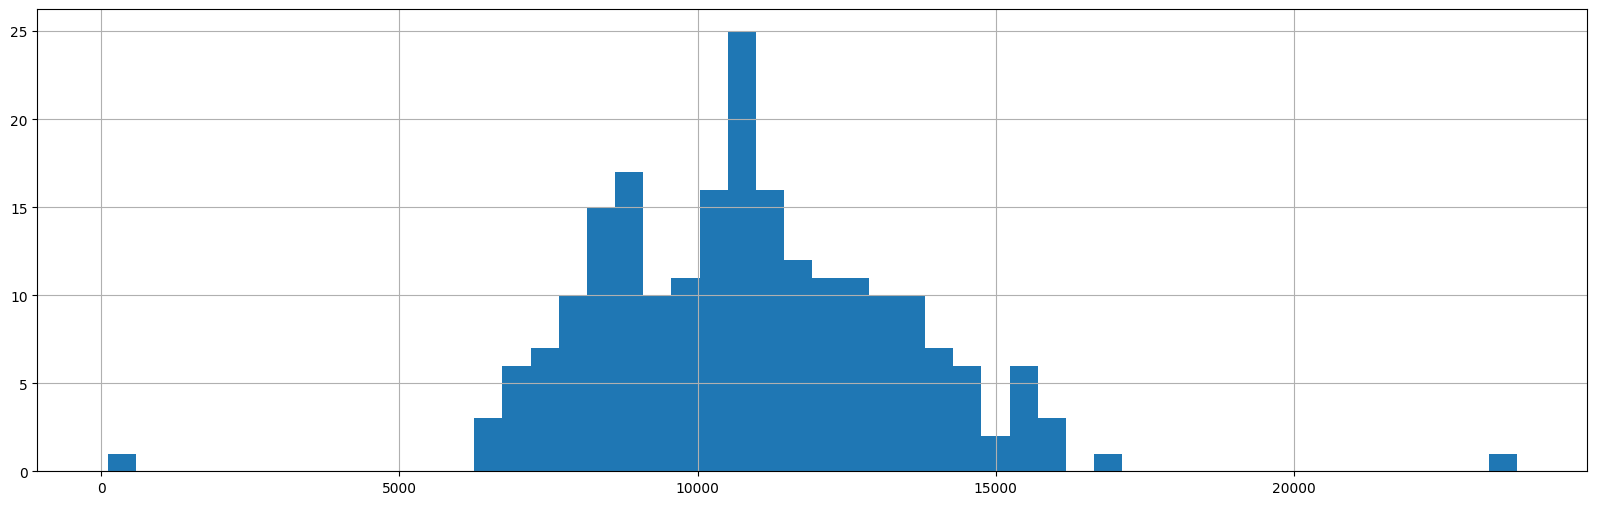

In [ ]:
mobile_sales.Sales.hist(bins = 50);

In [ ]:
lower= np.percentile(mobile_sales.Sales, 0.5)
lower

6522.12

In [ ]:
upper = np.percentile(mobile_sales.Sales, 99.5)
upper

16879.15999999999

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=upper, lower=lower)

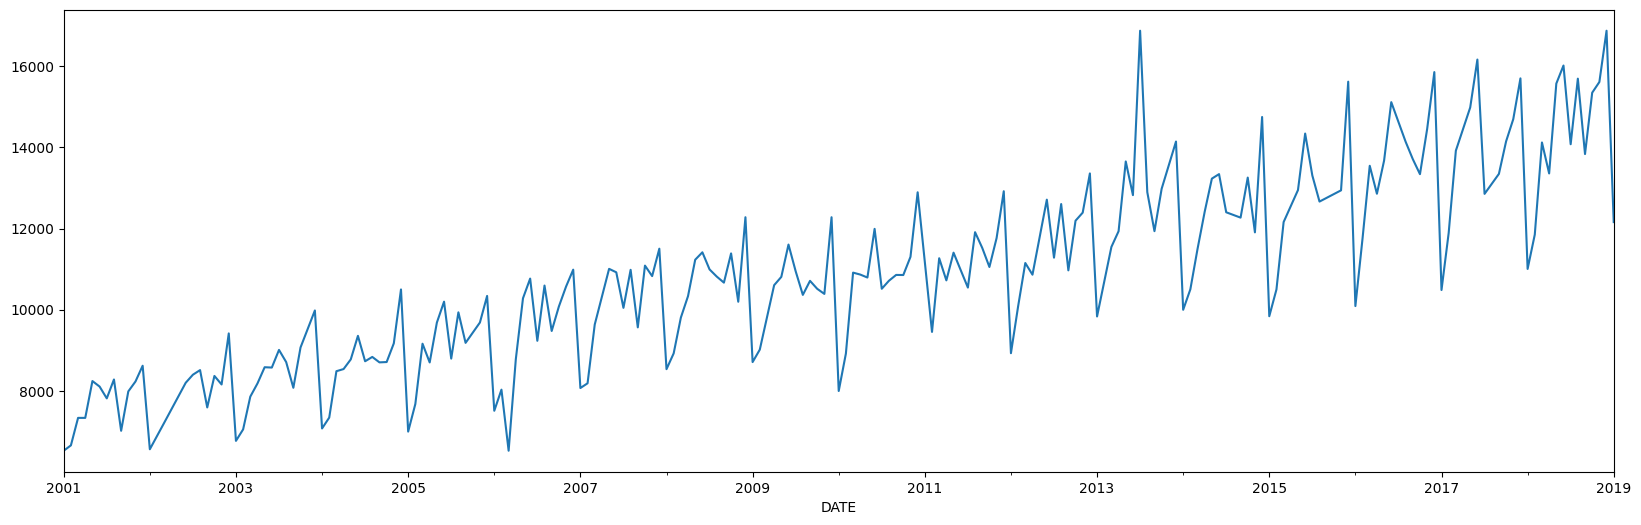

In [ ]:
mobile_sales.Sales.plot();

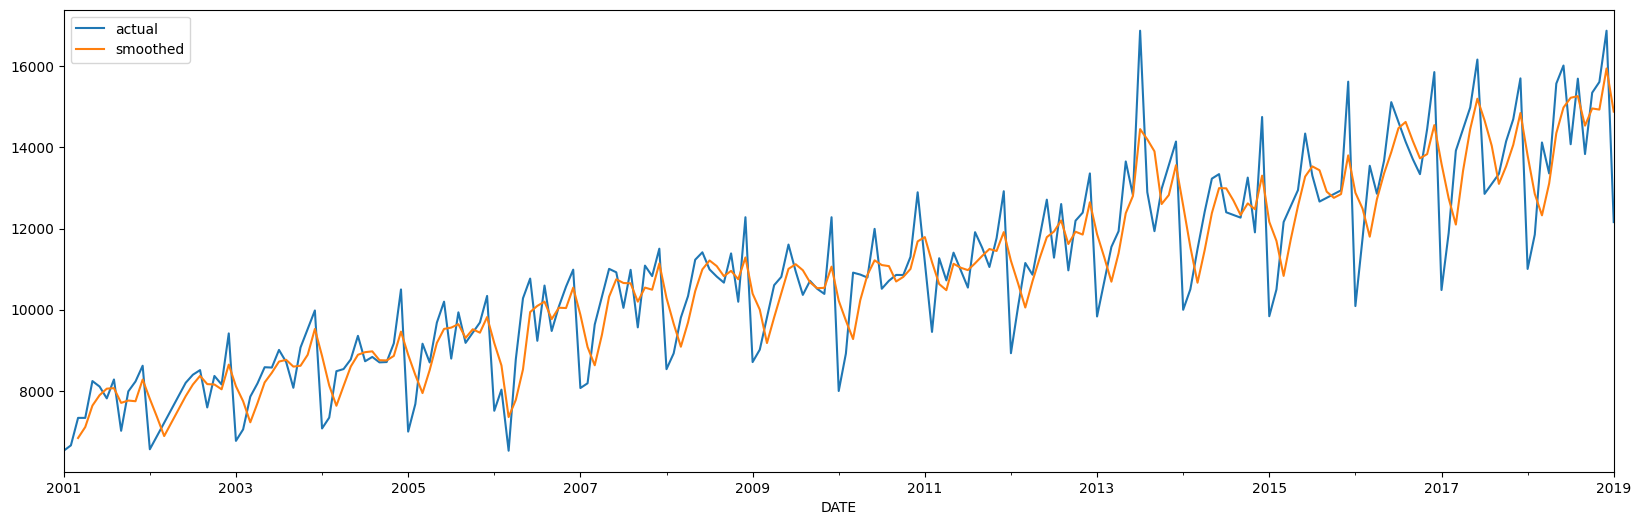

In [ ]:

mobile_sales.Sales.plot(label='actual')
mobile_sales.Sales.rolling(window=3, center = False).mean().plot(label='smoothed')
plt.legend()
plt.show()

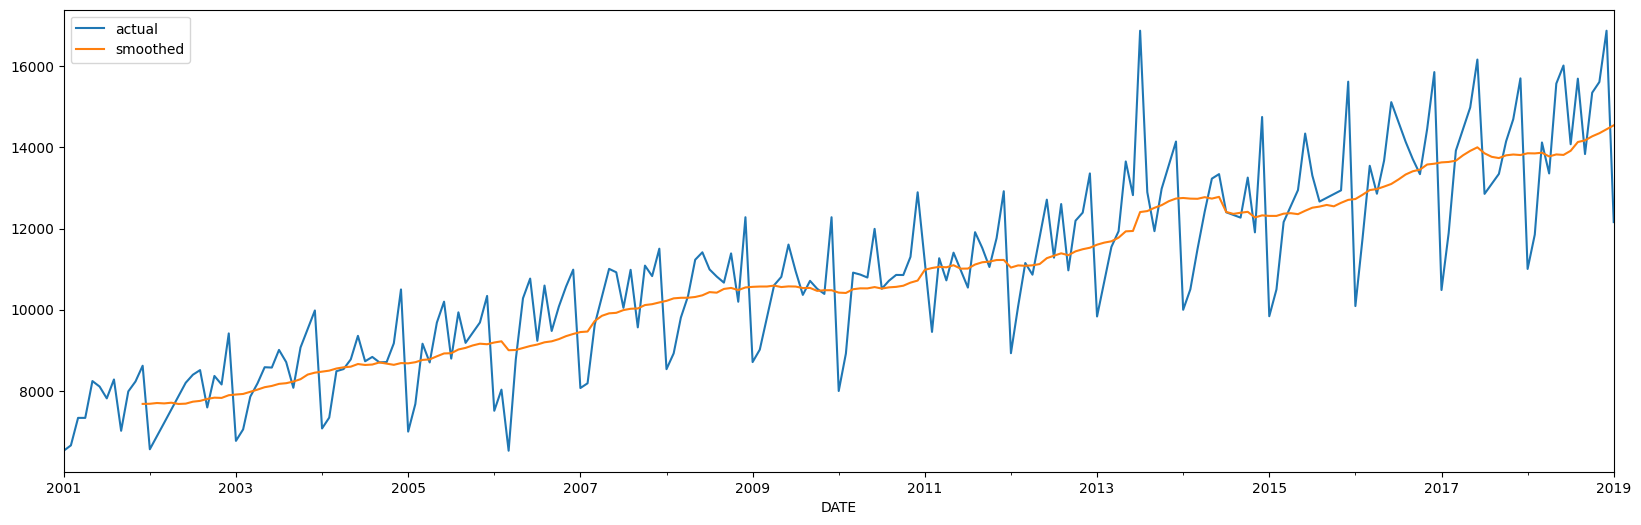

In [ ]:

mobile_sales.Sales.plot(label='actual')
mobile_sales.Sales.rolling(window=12, center = False).mean().plot(label='smoothed')
plt.legend()
plt.show()

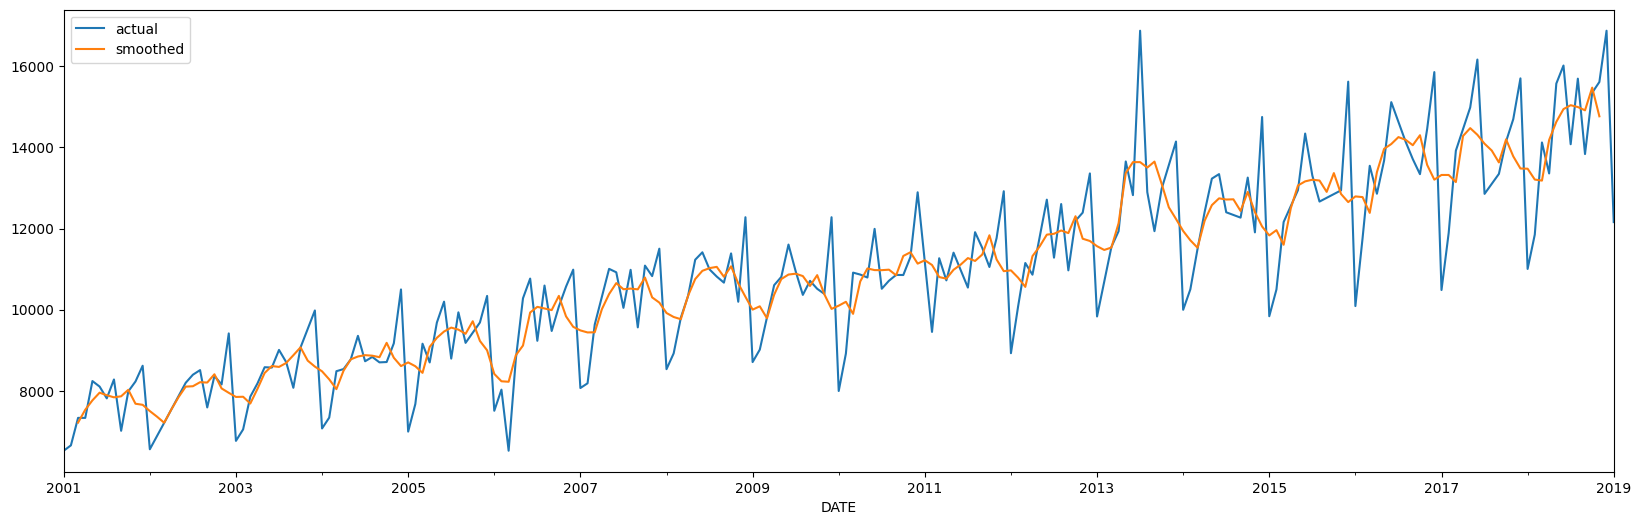

In [ ]:
# CMA
mobile_sales.Sales.plot(label='actual')
mobile_sales.Sales.rolling(window=5, center = True).mean().plot(label='smoothed')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model = 'additive')

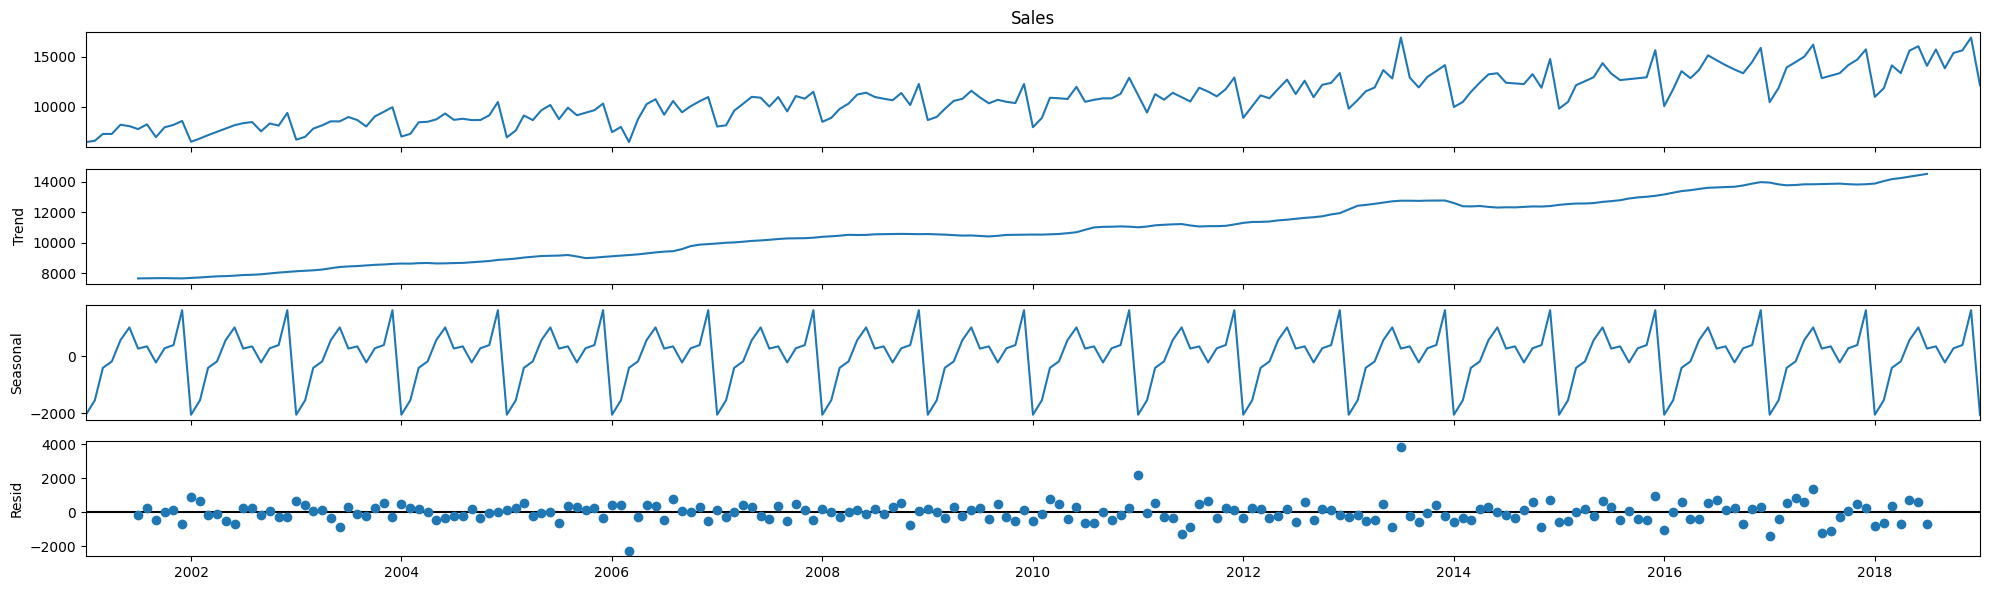

In [ ]:
model.plot();

## Decomposition from scratch

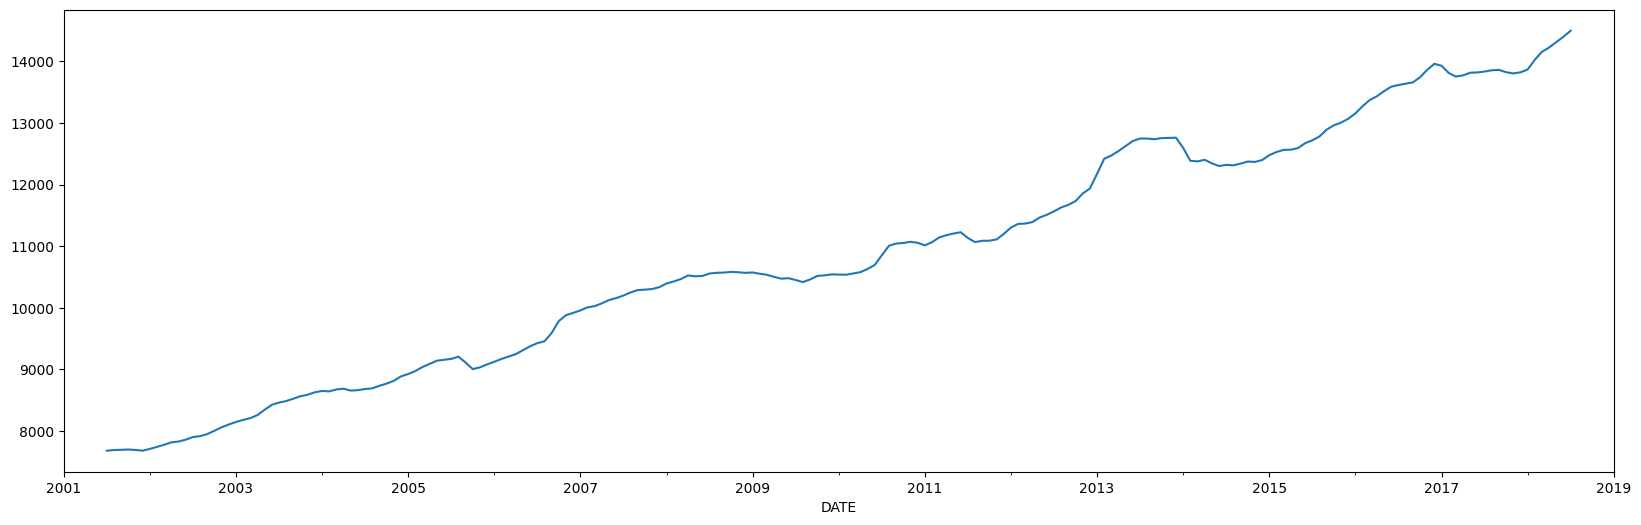

In [ ]:
model.trend.plot();

In [ ]:
# model.resid.plot();

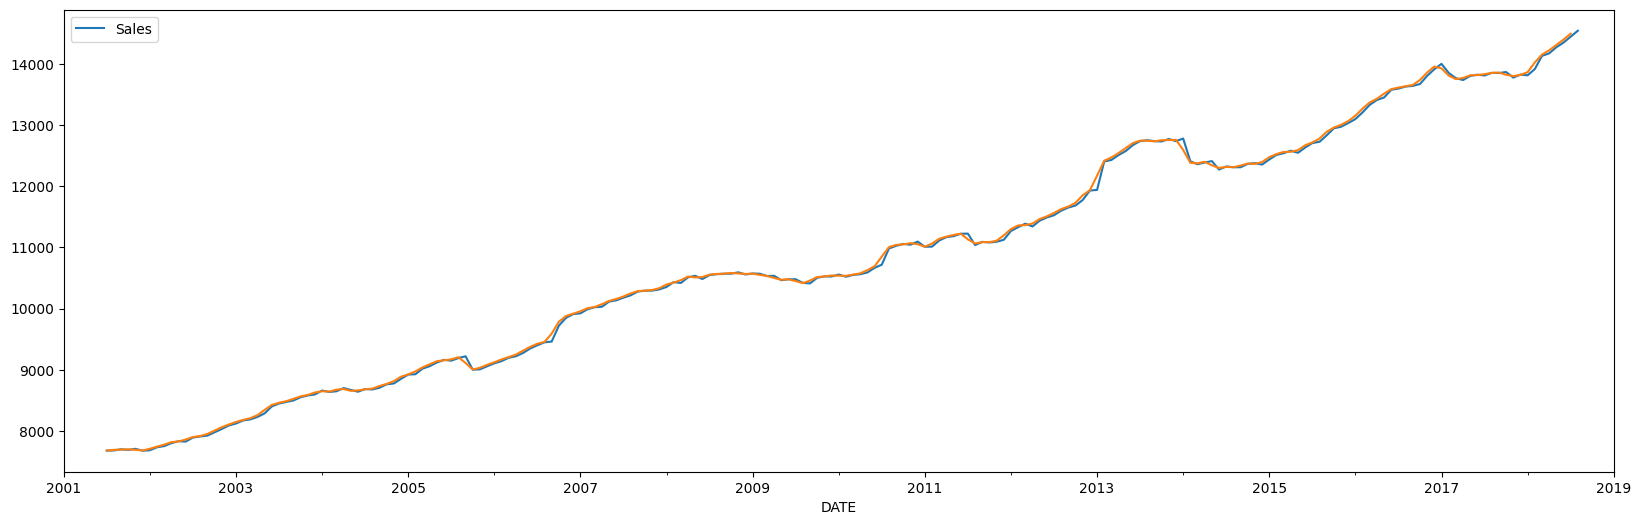

In [ ]:
trend = mobile_sales.rolling(12, center=True).mean()
trend.plot()
model.trend.plot();

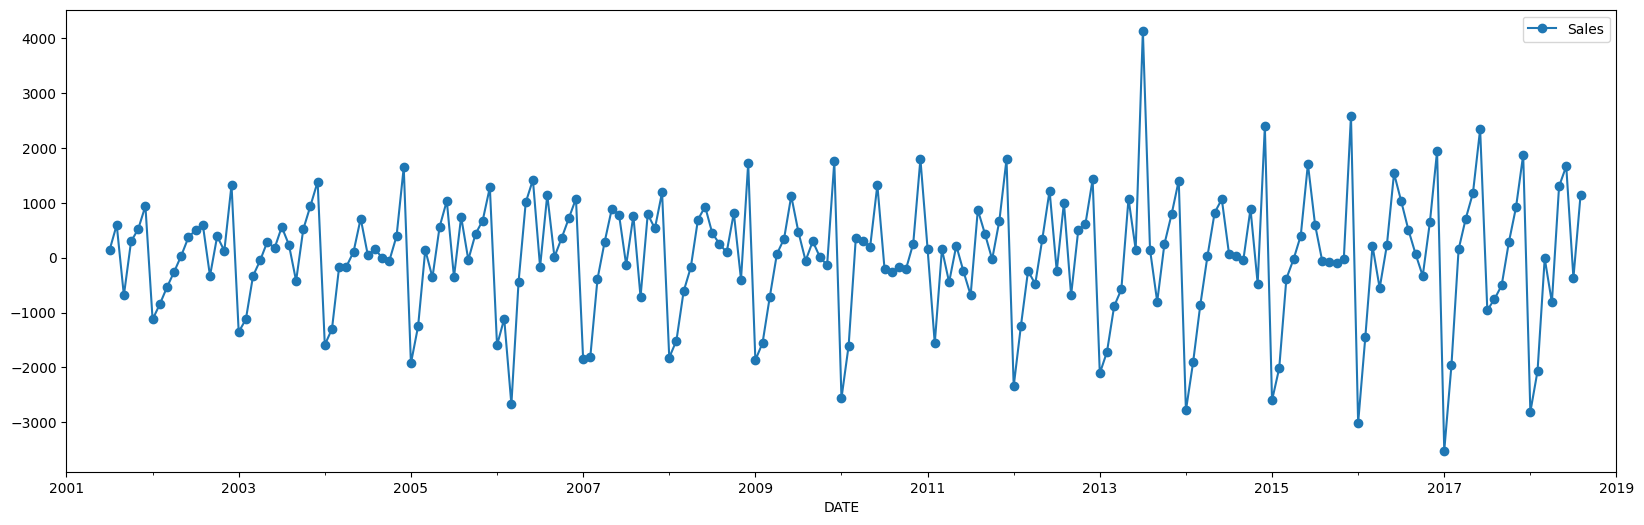

In [ ]:
de_trend = mobile_sales - trend
de_trend.plot(style= '-o');

In [ ]:
dtf = de_trend.reset_index()
dtf.head(10)

,DATE,Sales
0,2001-01-01,NaN
1,2001-02-01,NaN
2,2001-03-01,NaN
3,2001-04-01,NaN
4,2001-05-01,NaN
5,2001-06-01,NaN
6,2001-07-01,136.156667
7,2001-08-01,599.166667
8,2001-09-01,-684.833333
9,2001-10-01,296.250000


<Axes: xlabel='DATE'>

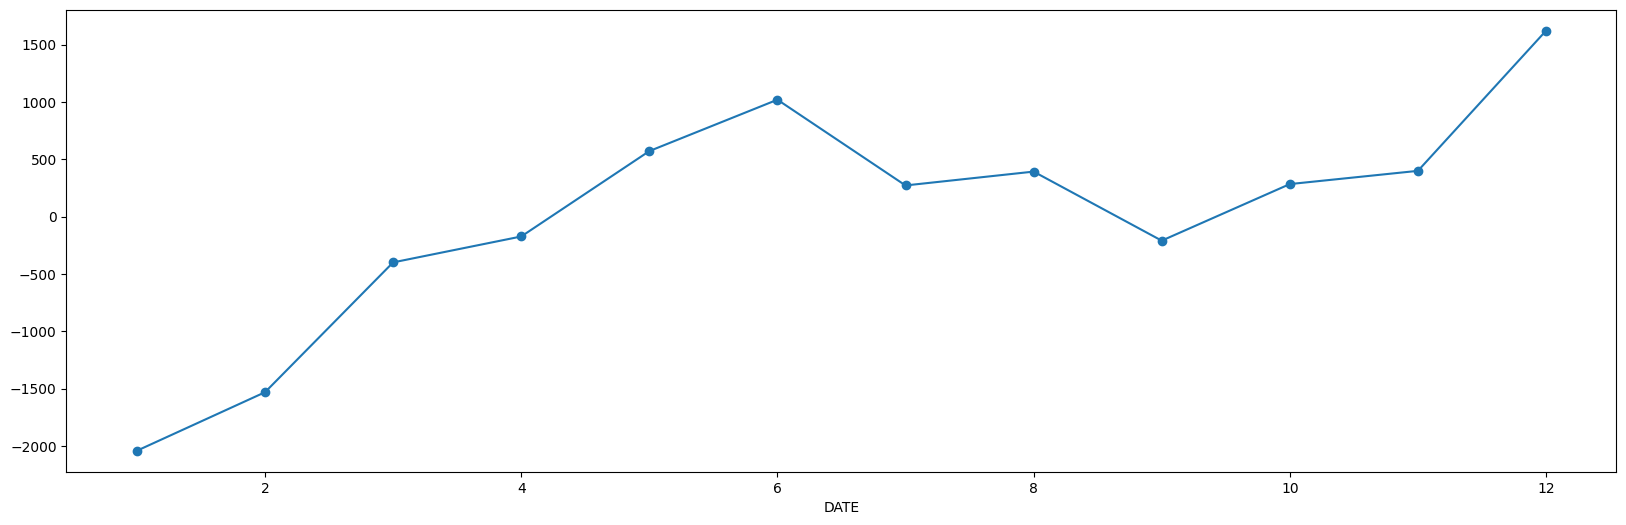

In [ ]:
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')

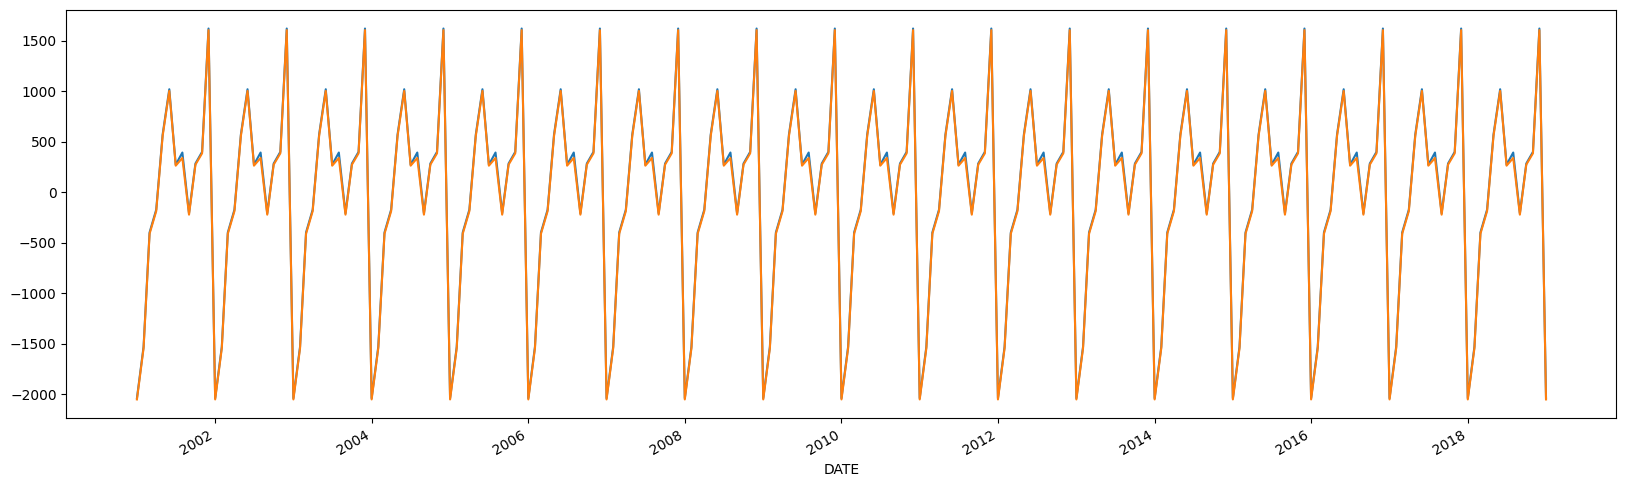

In [ ]:
plt.plot(dtf.DATE, dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot();

<Axes: >

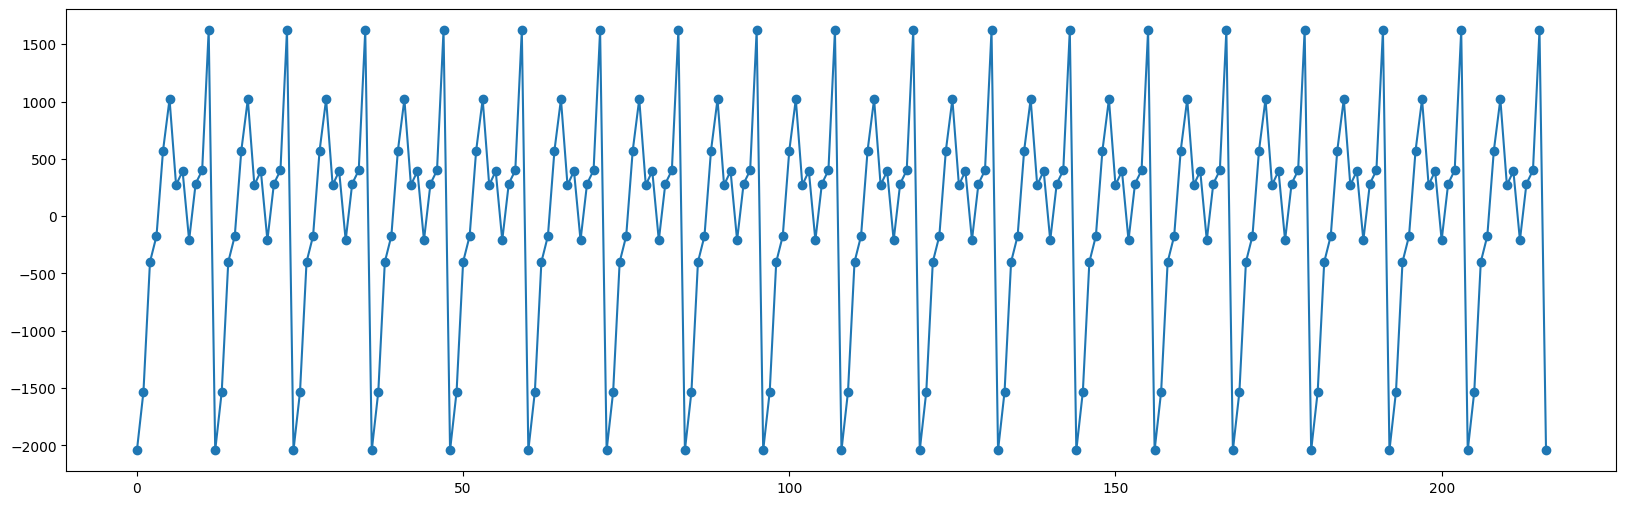

In [ ]:
dtf['season'] = dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean')
dtf['season'].plot(style='-o')

In [ ]:
dtf.head(10)

,DATE,Sales,season
0,2001-01-01,NaN,-2042.016078
1,2001-02-01,NaN,-1531.736667
2,2001-03-01,NaN,-399.386471
3,2001-04-01,NaN,-173.373922
4,2001-05-01,NaN,571.371176
5,2001-06-01,NaN,1019.606471
6,2001-07-01,136.156667,271.760926
7,2001-08-01,599.166667,392.456296
8,2001-09-01,-684.833333,-209.888627
9,2001-10-01,296.250000,283.665294


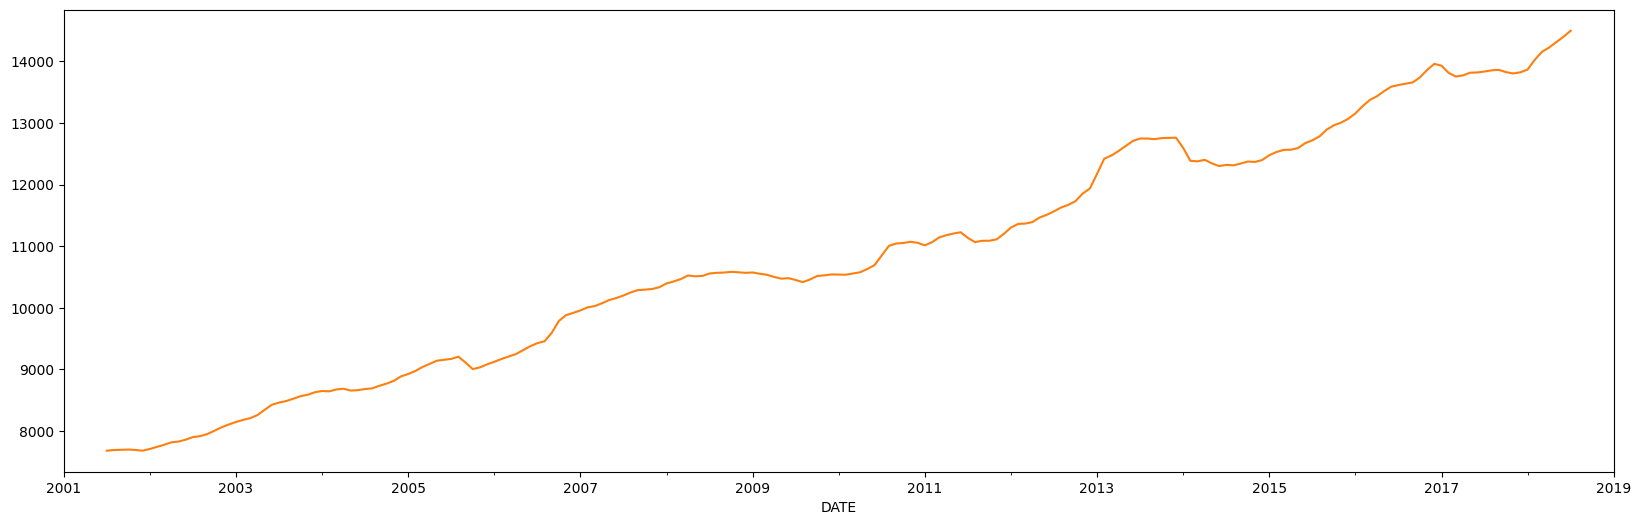

In [ ]:
trend_2 = pd.Series((mobile_sales.values[:, 0] - dtf['season']).rolling(12, center=True).mean(), index=model.trend.index)

trend_2.plot() # my trend
model.trend.plot(); # statsmodel trend


In [ ]:
train_max_date = mobile_sales.index[-12]

train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

In [ ]:
test_x

,Sales
DATE,
2018-02-01,11852.00
2018-03-01,14123.00
2018-04-01,13360.00
2018-05-01,15576.00
2018-06-01,16021.00
2018-07-01,14080.00
2018-08-01,15697.00
2018-09-01,13838.00
2018-10-01,15351.00


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
train_x['Sales'].mean()

10655.57756097561

In [ ]:
test_x['pred'] = train_x['Sales'].mean()

test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,10655.577561
2018-03-01,14123.0,10655.577561
2018-04-01,13360.0,10655.577561
2018-05-01,15576.0,10655.577561
2018-06-01,16021.0,10655.577561


MAE : 3890.436
RMSE : 4170.094
MAPE: 0.259


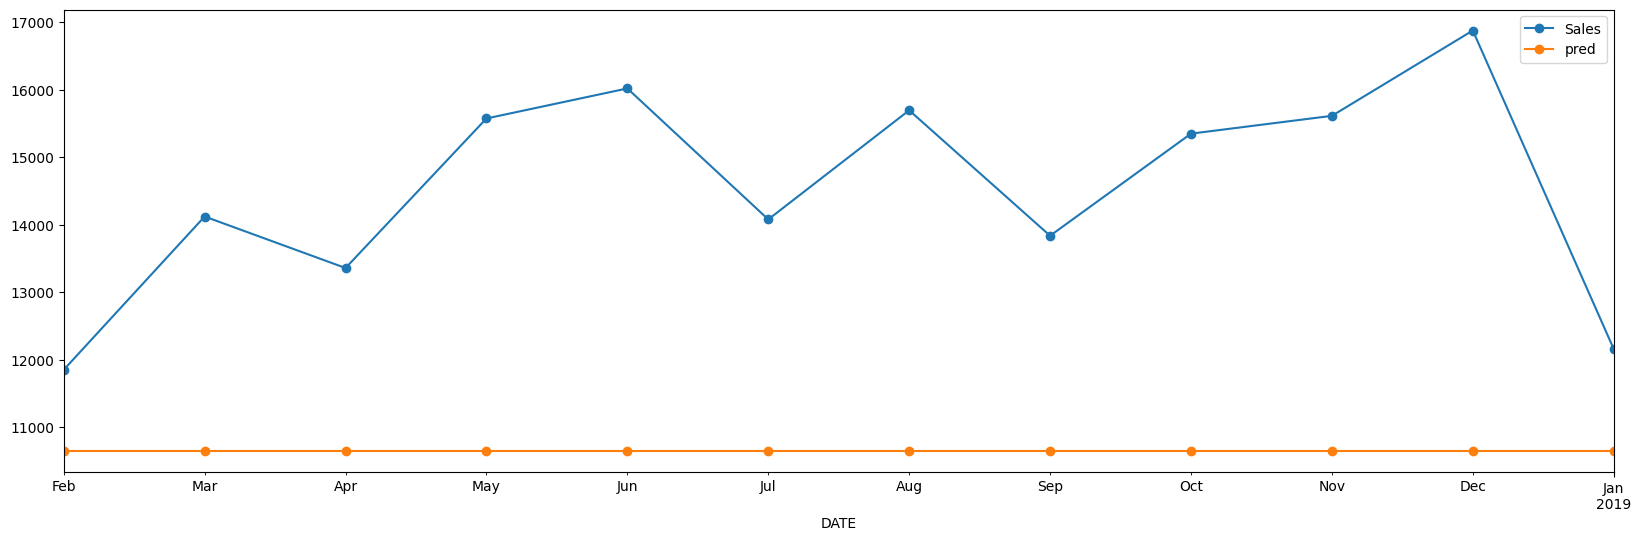

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
train_x['Sales'][-1]

11005.0

In [ ]:
test_x['pred'] = train_x['Sales'][-1]
test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,11005.0
2018-03-01,14123.0,11005.0
2018-04-01,13360.0,11005.0
2018-05-01,15576.0,11005.0
2018-06-01,16021.0,11005.0


MAE : 3541.013
RMSE : 3846.163
MAPE: 0.235


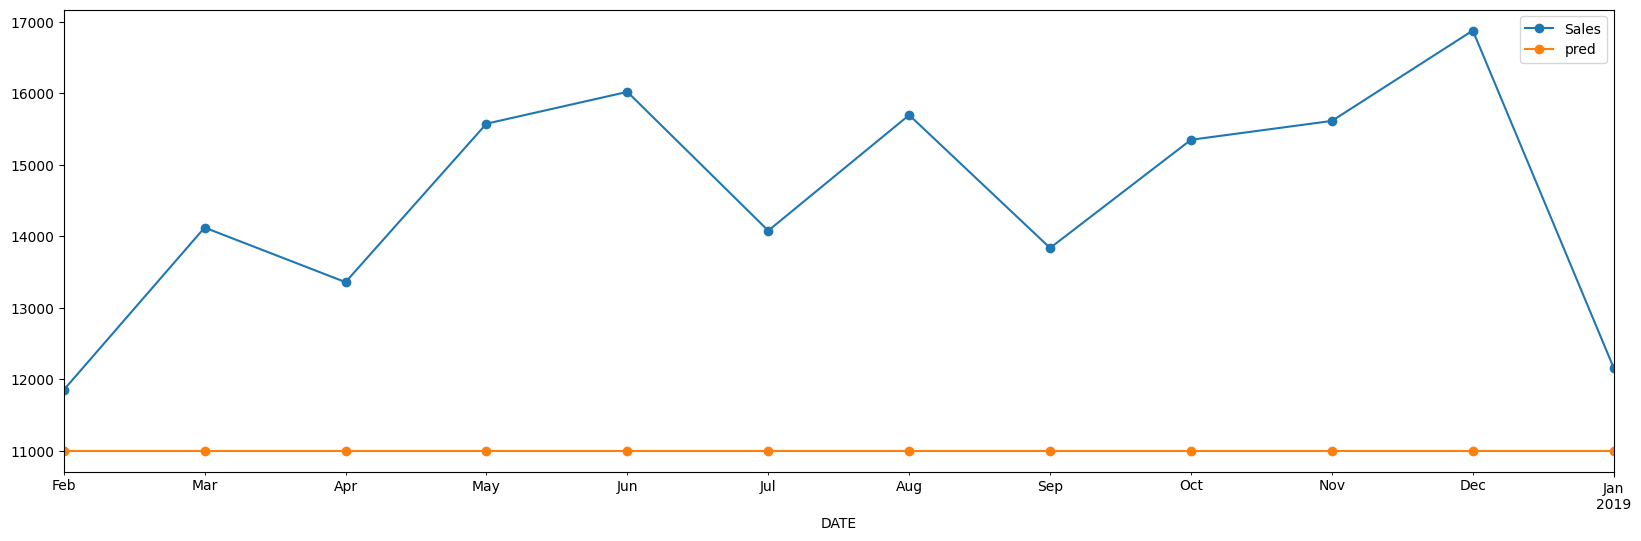

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.00,11005.0
2018-03-01,14123.00,11005.0
2018-04-01,13360.00,11005.0
2018-05-01,15576.00,11005.0
2018-06-01,16021.00,11005.0
2018-07-01,14080.00,11005.0
2018-08-01,15697.00,11005.0
2018-09-01,13838.00,11005.0
2018-10-01,15351.00,11005.0


In [ ]:
train_x.loc[test_x.index[1] - pd.DateOffset(years= 1)]

Sales    13921.0
Name: 2017-03-01 00:00:00, dtype: float64

In [ ]:
for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)].Sales

test_x

,Sales,pred
DATE,,
2018-02-01,11852.00,11891.0
2018-03-01,14123.00,13921.0
2018-04-01,13360.00,14453.5
2018-05-01,15576.00,14986.0
2018-06-01,16021.00,16168.0
2018-07-01,14080.00,12856.0
2018-08-01,15697.00,13102.5
2018-09-01,13838.00,13349.0
2018-10-01,15351.00,14150.0


MAE : 902.263
RMSE : 1120.819
MAPE: 0.061


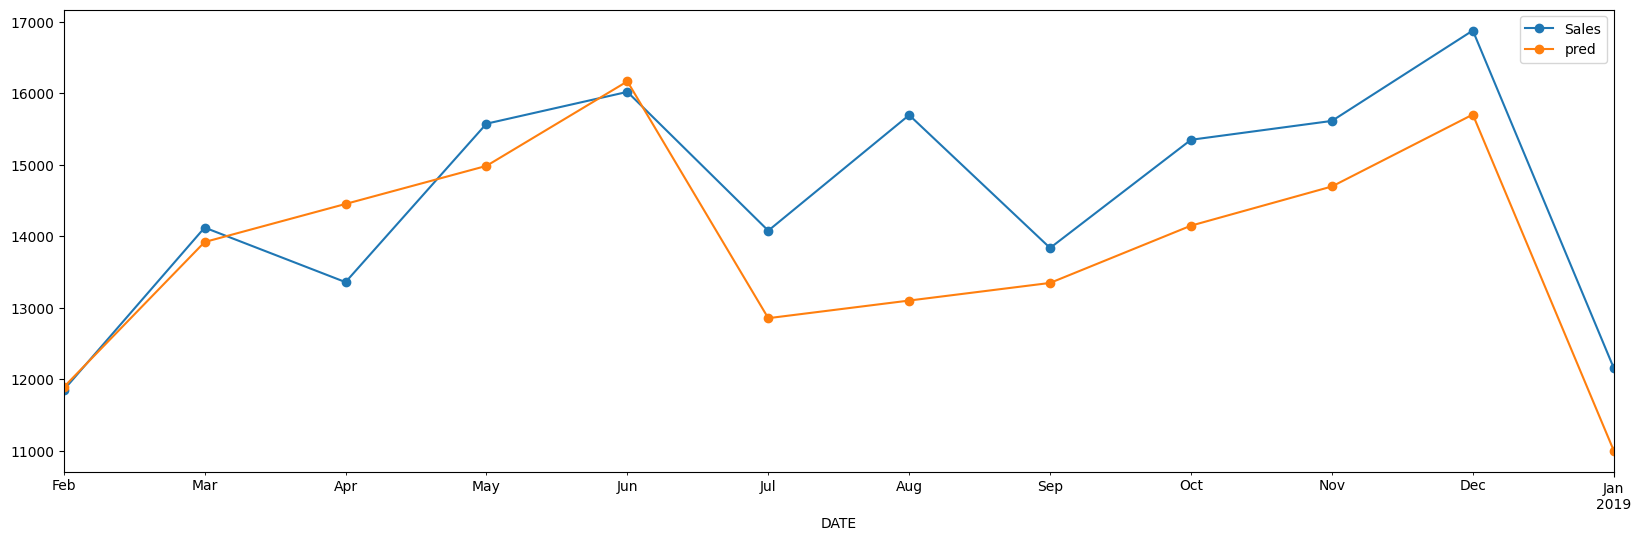

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
train_x.tail(12)

,Sales
DATE,
2017-02-01,11891.0
2017-03-01,13921.0
2017-04-01,14453.5
2017-05-01,14986.0
2017-06-01,16168.0
2017-07-01,12856.0
2017-08-01,13102.5
2017-09-01,13349.0
2017-10-01,14150.0


In [ ]:
test_x.tail(12)

,Sales,pred
DATE,,
2018-02-01,11852.00,11891.0
2018-03-01,14123.00,13921.0
2018-04-01,13360.00,14453.5
2018-05-01,15576.00,14986.0
2018-06-01,16021.00,16168.0
2018-07-01,14080.00,12856.0
2018-08-01,15697.00,13102.5
2018-09-01,13838.00,13349.0
2018-10-01,15351.00,14150.0


In [ ]:

y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

slope = (y_t - y_0) / len(train_x['Sales'])
h = np.linspace(0,len(test_x)-1, len(test_x))
h

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
test_x['pred'] = y_t + h*slope

MAE : 3420.741
RMSE : 3727.232
MAPE: 0.227


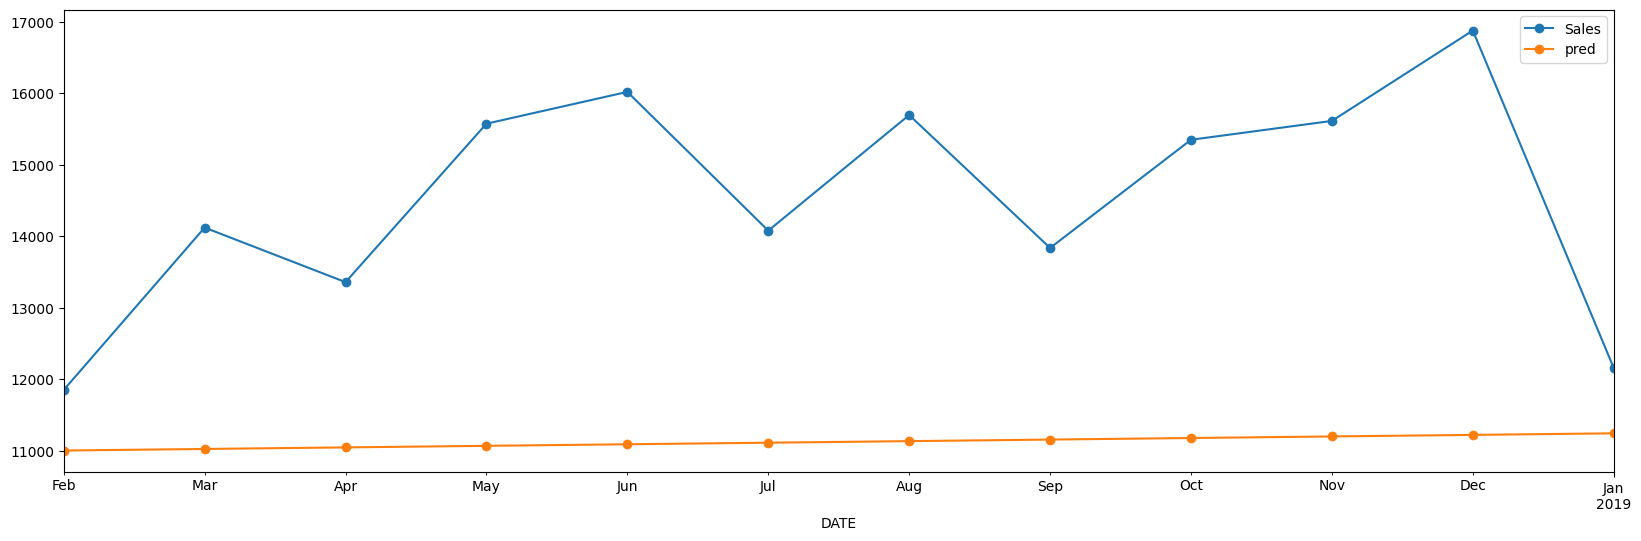

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [ ]:
train_x.tail()

,Sales
DATE,
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0
2017-12-01,15704.0
2018-01-01,11005.0


In [ ]:
pred_ = train_x.Sales.dropna().copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-3:].mean())

In [ ]:
test_x['pred'] = pred_[-12:]

MAE : 1799.247
RMSE : 2043.135
MAPE: 0.12


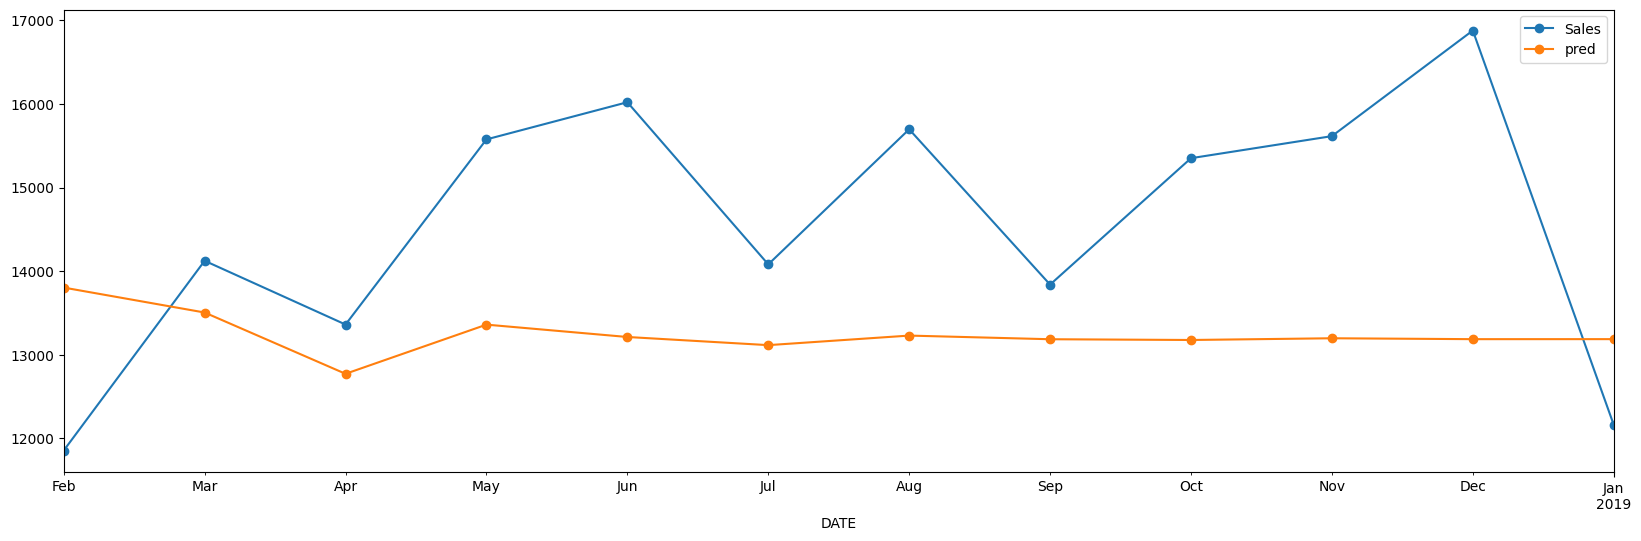

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales['Sales'])
model.fit(smoothing_level = 0.05).fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


DATE
2001-01-01     6522.120000
2001-02-01     6522.120000
2001-03-01     6528.714000
2001-04-01     6568.878300
2001-05-01     6607.034385
                  ...     
2018-09-01    13711.005891
2018-10-01    13717.355596
2018-11-01    13799.037816
2018-12-01    13889.835926
2019-01-01    14039.302129
Length: 217, dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='DATE'>

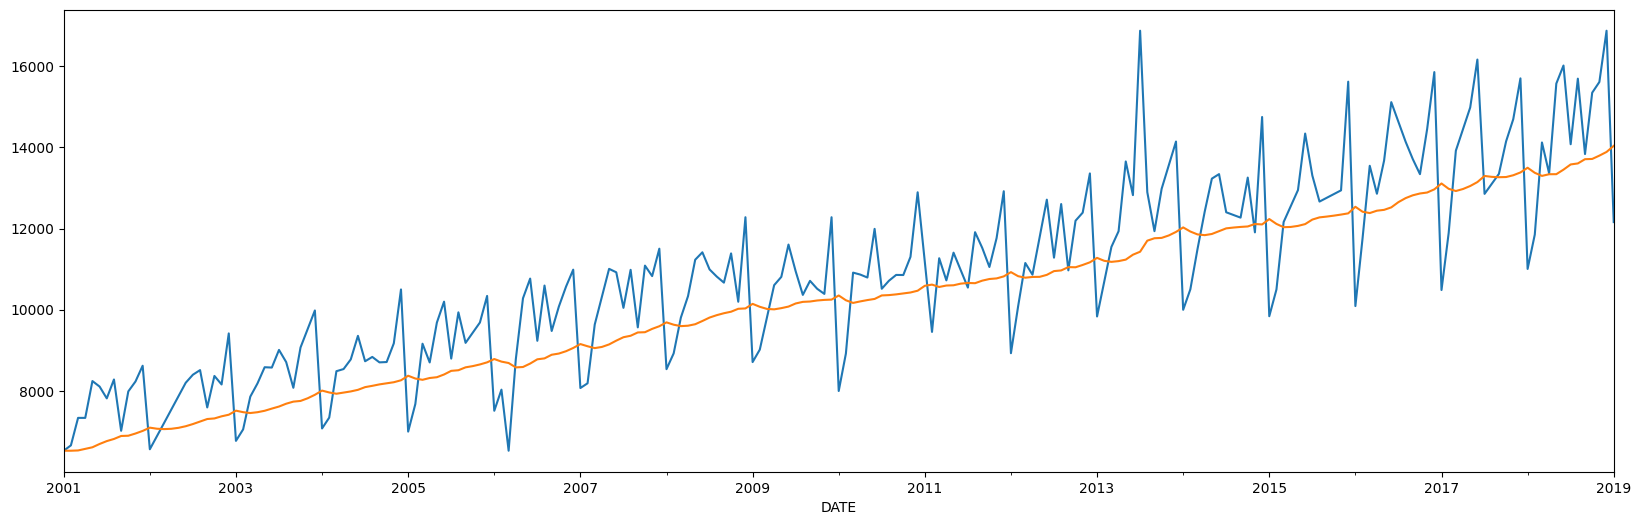

In [ ]:
mobile_sales.Sales.plot()
model.fit(smoothing_level = 0.05).fittedvalues.plot()

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.05)
pred = model.forecast(12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='DATE'>

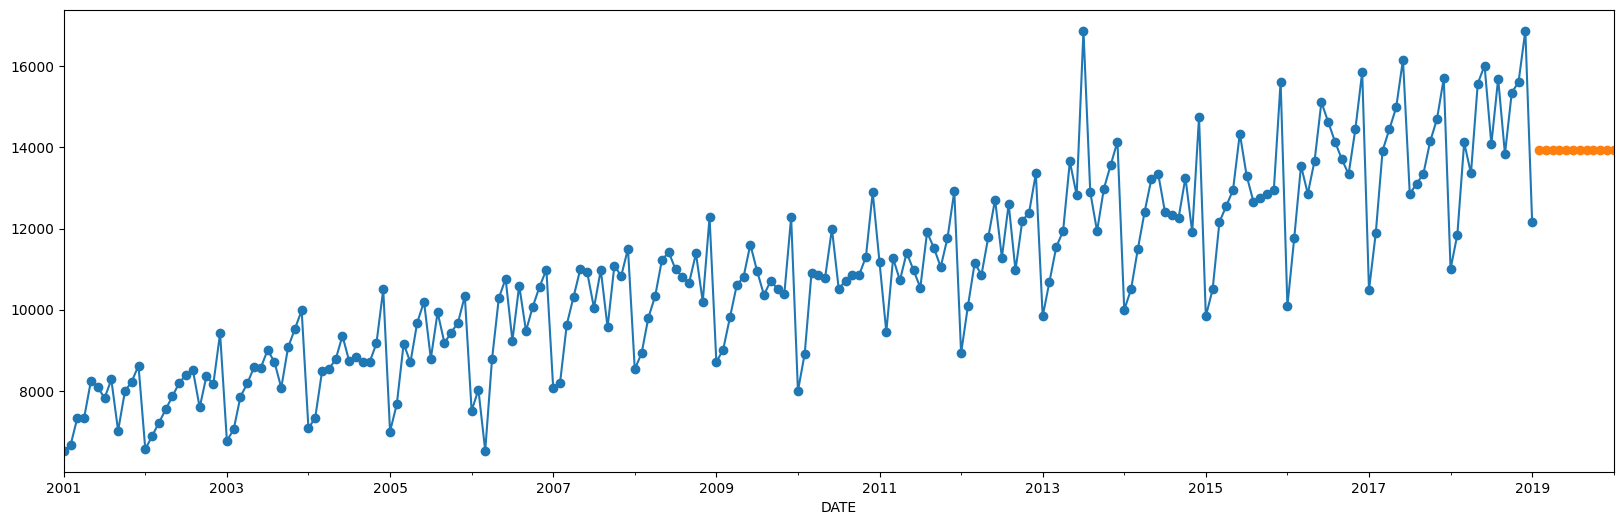

In [ ]:
mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')